In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_files
from PIL import Image
sns.set_context("talk")
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

PROCESSING IMAGES

In [6]:
def load_image_dataset(path):
    data = load_files(path)
    file_paths = data['filenames']
    targets = data['target']

    images = []
    for f in file_paths:
        img = Image.open(f).convert("RGB")
        images.append(np.array(img))

    images = np.array(images)
    targets = np.array(targets)
    return images, targets

In [97]:
import numpy as np
import os
import cv2

def load_images_dataset(label, num_images, kernal_size):
    root = os.path.join(os.getcwd(), 'data')
    path = os.path.join(root, label)
    file_paths = os.listdir(path)

    random_select = np.random.choice(file_paths, num_images, replace=False)
    images = []
    for f in random_select:
        img = cv2.imread(path + "\\" + f, cv2.IMREAD_GRAYSCALE)
        ksize = (kernal_size, kernal_size)
        blur = cv2.blur(img, ksize)
        normalized_img = cv2.normalize(blur, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
        images.append(normalized_img)

    return images

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


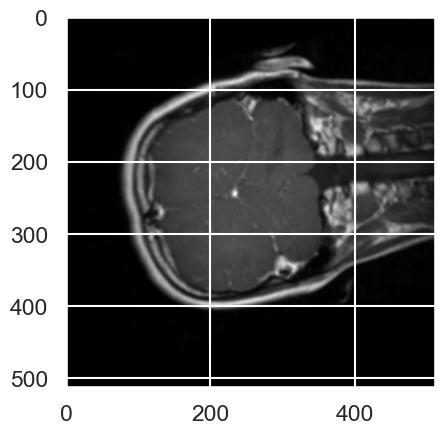

In [98]:
import matplotlib.pyplot as plt
images = load_images_dataset('glioma', 200, 5)
plt.imshow(images[1], cmap='gray')

In [3]:
from pathlib import Path

# Load images from the 'data/glioma' subfolder
data_dir = Path("data") / "glioma"
images, targets = load_image_dataset(str(data_dir))
print(f"Loaded images: {images.shape}, targets: {targets.shape}")

Loaded images: (0,), targets: (0,)


SUPERVISED LEARNING MODEL

UNSUPERVISED LEARNING MODEL

In [3]:
def kmeans(X, k, max_iter=10, rand_seed=0):
    np.random.seed(rand_seed)
    Mu = X[np.random.choice(X.shape[0],k),:]    
    for i in range(max_iter):
        D = -2*X@Mu.T + (X**2).sum(axis=1)[:,None] + (Mu**2).sum(axis=1)   
        y = np.argmin(D,axis=1)
        Mu = np.array([np.mean(X[y==i],axis=0) for i in range(k)])         
    loss = np.linalg.norm(X - Mu[np.argmin(D,axis=1),:])**2/X.shape[0]   
    return Mu, y, loss